# Logistic Regression

A classic method for binary classification tasks. We will build our own version here, and visualize the model results.

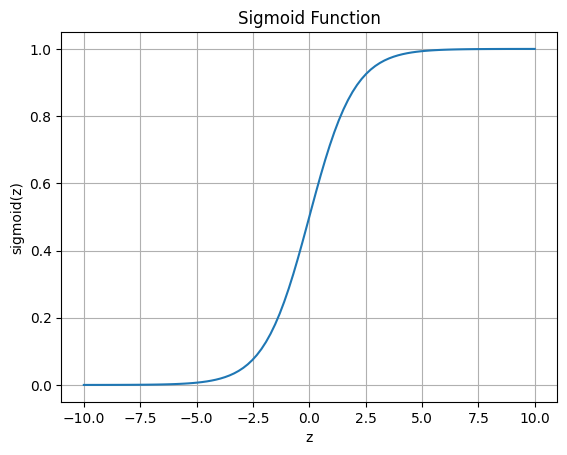

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#sigmoid function
def sigmoid(z: np.ndarray) -> np.ndarray:
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

#plot it out
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()

For logistic regression, the cost function (also called log loss) for all training samples is:

$$ J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} [ y^{(i)} \log(\sigma(\theta^T x^{(i)})) + (1 - y^{(i)}) \log(1 - \sigma(\theta^T x^{(i)})) ] $$

Where:
- $m$ is the number of training examples
- $y^{(i)}$ is the actual class label of the i-th training example
- $x^{(i)}$ is the feature vector of the i-th training example
- $\theta$ is the vector of weights
- $\sigma$ is the sigmoid function

The gradient of the cost function with respect to the j-th parameter is given by:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (\sigma(\theta^T x^{(i)}) - y^{(i)}) x^{(i)}_j $$

In [2]:
def loss_function(x: np.ndarray, y: np.ndarray, theta: np.ndarray) -> float:
    predictions = sigmoid(np.dot(x,theta))
    epsilon = 1e-5
    predictions = np.clip(predictions, epsilon, 1 - epsilon) #clip values to avoid taking log(0)
    error = np.mean((-y * np.log(predictions)) - ((1-y)*np.log(1-predictions)))
    return error

def gradient(x: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    m = y.shape[0]
    predictions = sigmoid(np.dot(x, theta))
    return 1/m * np.dot(x.T, (predictions - y))

Load in an example dataset for binary classification

(569, 30) (569,)


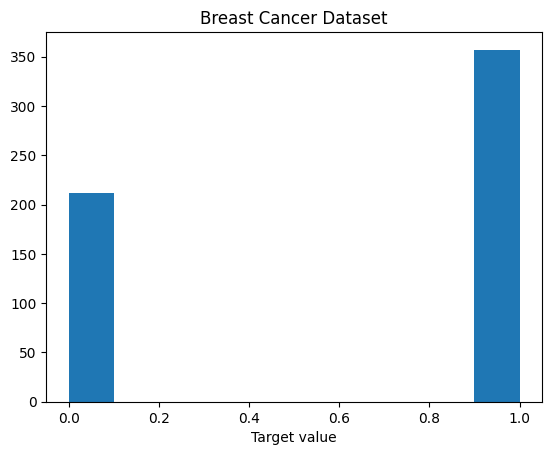

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
x = data['data']
y = data['target']

print(x.shape, y.shape)

plt.title('Breast Cancer Dataset')
plt.xlabel('Target value')
plt.hist(y);

Define the gradient descent function, and learn parameters

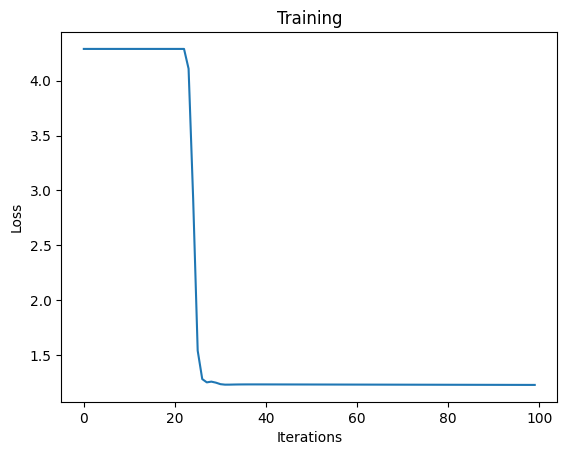

In [4]:
def gradient_descent(x: np.ndarray, y: np.ndarray, theta: np.ndarray, learning_rate: float, num_iterations: int) -> np.ndarray:
    loss_history = np.zeros(num_iterations)
    for i in range(num_iterations):
        theta = theta - learning_rate * gradient(x, y, theta)
        loss_history[i] = loss_function(x, y, theta)
    plt.title("Training")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.plot(loss_history)
    return theta

theta = np.ones(x.shape[1])
theta = gradient_descent(x, y, theta, 0.0001, 100)

Visualize the model's output in a variety of methods

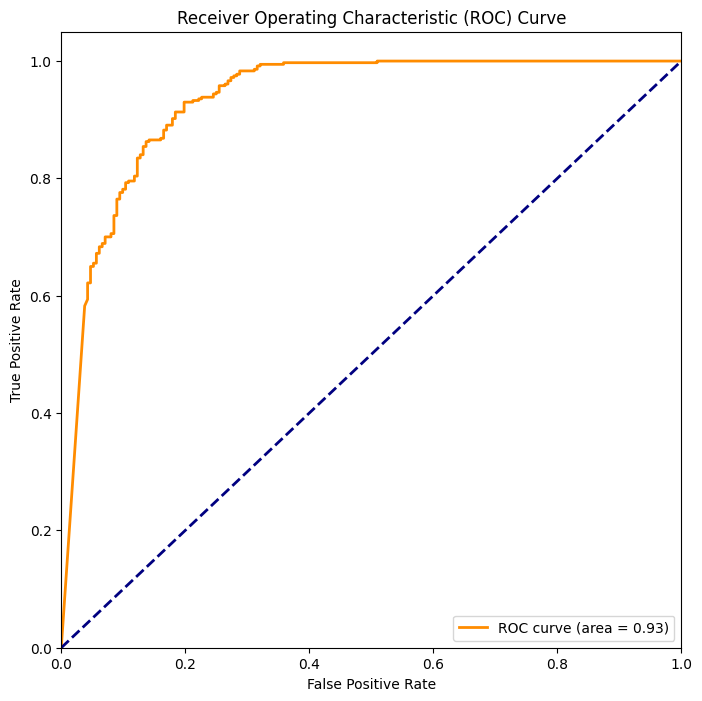

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_scores = sigmoid(np.dot(x, theta))

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

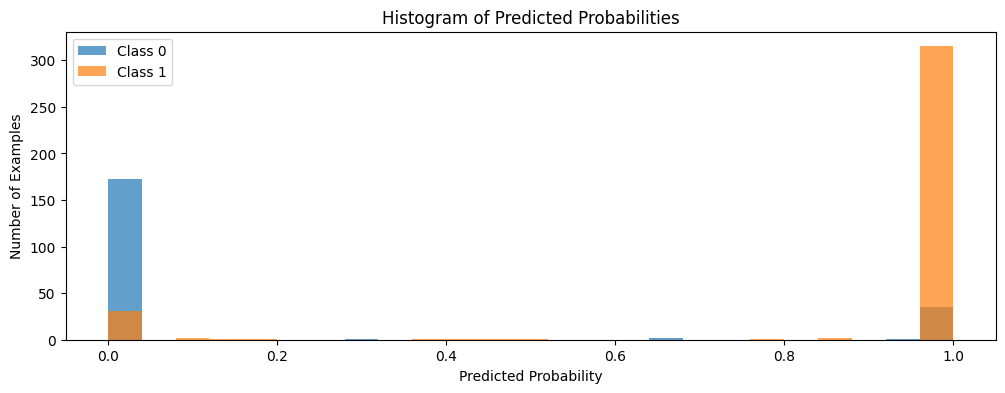

In [6]:
probs = sigmoid(np.dot(x, theta))

# Plot
plt.figure(figsize=(12, 4))

plt.hist(probs[y==0], bins=25, label='Class 0', alpha=0.7)
plt.hist(probs[y==1], bins=25, label='Class 1', alpha=0.7)

plt.xlabel('Predicted Probability')
plt.ylabel('Number of Examples')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()

In what way can the output of a logistic regression model be interpreted as probabilities?